In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
df = pd.read_csv('Data/Life_Expectancy_Grouped.csv')
df.head()

,Country,Year_Cohort,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Schooling,region,sub_region
0,Afghanistan,2000-2003,56.066667,204.666667,87.666667,0.0100,64.000000,4015.333333,13.000000,37.333333,8.126667,36.666667,0.1,168.023825,9.103746e+06,6.200000,Asia,Southern Asia
1,Afghanistan,2004-2007,57.275000,293.500000,84.500000,0.0225,65.000000,1223.250000,14.475000,46.000000,7.912500,46.000000,0.1,221.708762,1.339573e+07,7.800000,Asia,Southern Asia
2,Afghanistan,2008-2011,58.675000,280.500000,75.500000,0.0150,65.250000,2365.500000,16.450000,65.250000,8.705000,65.250000,0.1,359.030146,2.218882e+06,9.075000,Asia,Southern Asia
3,Afghanistan,2012-2015,61.075000,268.500000,65.250000,0.0100,64.500000,1215.750000,18.350000,48.250000,8.247500,64.500000,0.1,624.664925,1.737318e+07,9.950000,Asia,Southern Asia
4,Albania,2000-2003,73.233333,15.666667,1.000000,4.0900,96.333333,14.000000,46.933333,97.333333,6.190000,97.333333,0.1,990.099241,1.264333e+05,10.666667,Europe,Southern Europe


In [3]:
df.columns

Index(['Country', 'Year_Cohort', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population',
       'Schooling', 'region', 'sub_region'],
      dtype='object')

<Axes: >

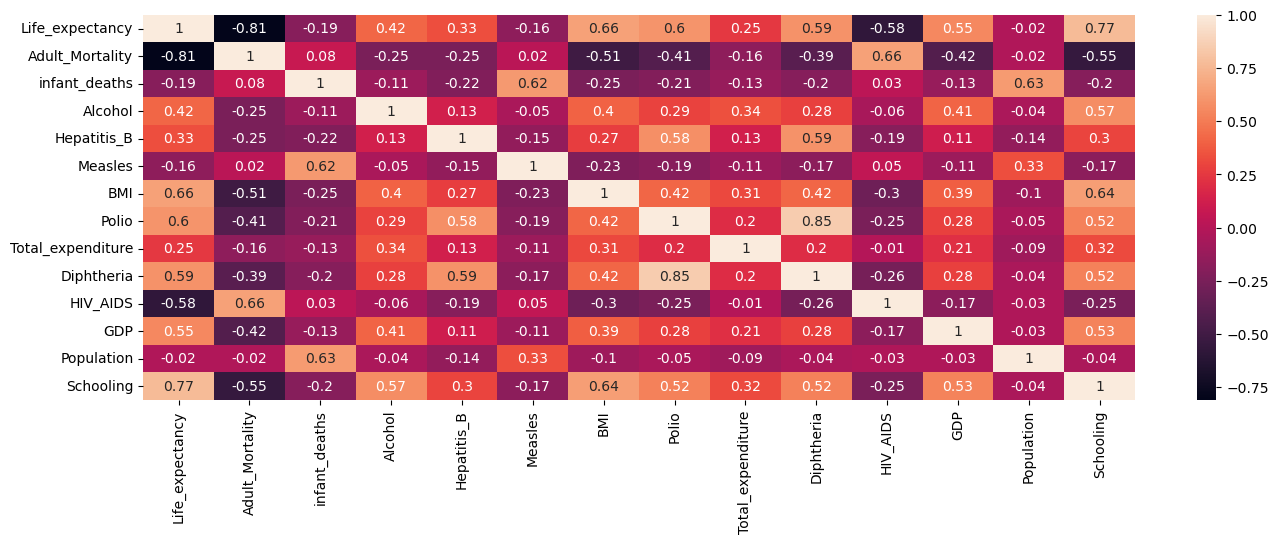

In [4]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
import statsmodels.formula.api as smf

model_slr = smf.ols(
    'Life_expectancy ~ Adult_Mortality',
    data=df).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     1306.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.17e-162
Time:                        20:07:38   Log-Likelihood:                -2201.4
No. Observations:                 704   AIC:                             4407.
Df Residuals:                     702   BIC:                             4416.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          80.9243      0.380    212.698      0.000      80.177      81.671
Adult_Mortality    -0.0706      0.002    -36.144      0.000      -0.074      -0.067
==============================================================================
Omnibus:                      271.727   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.749
Skew:                          -1.700   Prob(JB):                    1.94e-286
Kurtosis:                       8.770   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices("Life_expectancy ~  C(region) + C(Year_Cohort) + Adult_Mortality + infant_deaths + Alcohol + Hepatitis_B + Measles + BMI + Polio + Total_expenditure + Diphtheria + HIV_AIDS + GDP + Population + Schooling",
                 data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                     features
0    65.790573                    Intercept
1     2.580902        C(region)[T.Americas]
2     2.230806            C(region)[T.Asia]
3     4.301514          C(region)[T.Europe]
4     1.614521         C(region)[T.Oceania]
5     1.566894  C(Year_Cohort)[T.2004-2007]
6     1.646514  C(Year_Cohort)[T.2008-2011]
7     1.769239  C(Year_Cohort)[T.2012-2015]
8     2.894880              Adult_Mortality
9     2.536565                infant_deaths
10    2.900885                      Alcohol
11    1.721093                  Hepatitis_B
12    1.740726                      Measles
13    2.359151                          BMI
14    4.005782                        Polio
15    1.300411            Total_expenditure
16    4.174143                   Diphtheria
17    2.049197                     HIV_AIDS
18    1.611391                          GDP
19    1.739401                   Population
20    3.179244                    Schooling


In [7]:
model_full = smf.ols(
    'Life_expectancy ~ C(region) + C(Year_Cohort) + Adult_Mortality + infant_deaths + Alcohol + Hepatitis_B + Measles + BMI + Polio + Total_expenditure + Diphtheria + HIV_AIDS + GDP + Population + Schooling', 
    data = df).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     260.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.03e-303
Time:                        20:07:38   Log-Likelihood:                -1812.4
No. Observations:                 704   AIC:                             3667.
Df Residuals:                     683   BIC:                             3762.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      54.0317      0.986     54.822      0.000      52.097      55.967
C(region)[T.Americas]           4.2787      0.500      8.555      0.000       3.297       5.261
C(region)[T.Asia]               3.0472      0.416      7.325      0.000       2.230       3.864
C(region)[T.Europe]             4.0412      0.618      6.534      0.000       2.827       5.256
C(region)[T.Oceania]            2.2030      0.667      3.303      0.001       0.893       3.512
C(Year_Cohort)[T.2004-2007]     0.0160      0.351      0.046      0.964      -0.674       0.706
C(Year_Cohort)[T.2008-2011]     0.3359      0.360      0.933      0.351      -0.371       1.043
C(Year_Cohort)[T.2012-2015]     0.5472      0.373      1.466      0.143      -0.186       1.280
Adult_Mortality                -0.0264      0.002    -13.625      0.000      -0.030      -0.023
infant_deaths                  -0.0011      0.002     -0.705      0.481      -0.004       0.002
Alcohol                        -0.0717      0.052     -1.388      0.165      -0.173       0.030
Hepatitis_B                    -0.0230      0.008     -2.919      0.004      -0.039      -0.008
Measles                      -2.12e-05   1.85e-05     -1.147      0.252   -5.75e-05    1.51e-05
BMI                             0.0364      0.011      3.392      0.001       0.015       0.057
Polio                           0.0551      0.013      4.240      0.000       0.030       0.081
Total_expenditure              -0.0033      0.062     -0.053      0.958      -0.125       0.118
Diphtheria                      0.0433      0.013      3.361      0.001       0.018       0.069
HIV_AIDS                       -0.3129      0.040     -7.833      0.000      -0.391      -0.234
GDP                          9.181e-05   1.34e-05      6.873      0.000    6.56e-05       0.000
Population                   1.553e-10   3.27e-09      0.048      0.962   -6.26e-09    6.57e-09
Schooling                       0.7818      0.066     11.910      0.000       0.653       0.911
==============================================================================
Omnibus:                       20.273   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.358
Skew:                          -0.263   Prob(JB):                     4.22e-07
Kurtosis:                       3.851   Cond. No.                     4.13e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_full.resid, model_full.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 86.17165955612174, 'LM-Test p-value': 3.435098996374327e-10}


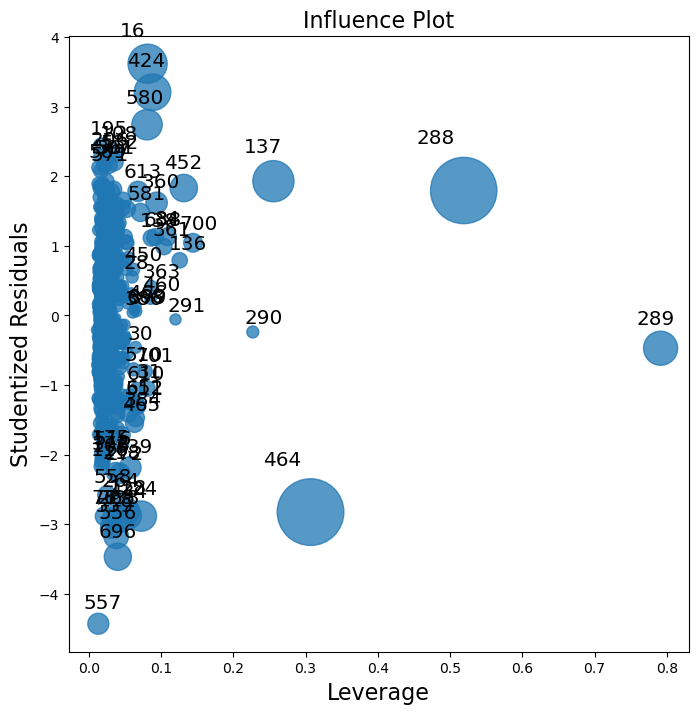

In [9]:
# Influence Point
infl = model_full.get_influence()
fig, ax = plt.subplots(figsize=(8,8))
fig=sm.graphics.influence_plot(
    model_full, ax=ax, criterion="cooks")

In [10]:
n = df.shape[0]
p = len(model_full.params)

# External Studentized Residuals
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
df_resid = pd.DataFrame({"index": df.index[atyp_stud], "resid": reg_studs[atyp_stud]})

# Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d
atyp_cook = np.abs(reg_cook) >= 4/n
df_cook = pd.DataFrame({"index": df.index[atyp_cook], "cook": reg_cook[atyp_cook]})

In [11]:
infl_cook = pd.merge(
    df_resid, df_cook, 
    on="index", how="inner")
infl_cook

,index,resid,cook
0,16,3.619346,0.054354
1,76,-2.887665,0.008873
2,108,2.339580,0.009238
3,124,-2.884458,0.030792
4,128,-2.814932,0.020737
5,218,-2.250043,0.009279
6,264,-2.686662,0.013664
7,265,-2.923964,0.014143
8,272,-2.270879,0.011012
9,338,-2.952381,0.017896


In [12]:
# Delete the points that are high in both criterion
del_index = list(infl_cook['index'])
df_final = df.drop(del_index)

# Fit the model again
model_full_new = smf.ols(
    'Life_expectancy ~ C(region) + C(Year_Cohort) + Adult_Mortality + infant_deaths + Alcohol + Hepatitis_B + Measles + BMI + Polio + Total_expenditure + Diphtheria + HIV_AIDS + GDP + Population + Schooling', 
    data = df_final).fit()
model_full_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     325.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:07:41   Log-Likelihood:                -1655.5
No. Observations:                 682   AIC:                             3353.
Df Residuals:                     661   BIC:                             3448.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      56.3511      0.942     59.836      0.000      54.502      58.200
C(region)[T.Americas]           3.7125      0.441      8.419      0.000       2.847       4.578
C(region)[T.Asia]               2.3394      0.365      6.406      0.000       1.622       3.057
C(region)[T.Europe]             3.4130      0.545      6.259      0.000       2.342       4.484
C(region)[T.Oceania]            2.0480      0.599      3.421      0.001       0.872       3.224
C(Year_Cohort)[T.2004-2007]    -0.0255      0.309     -0.082      0.934      -0.633       0.582
C(Year_Cohort)[T.2008-2011]     0.4537      0.317      1.432      0.153      -0.168       1.076
C(Year_Cohort)[T.2012-2015]     0.5176      0.327      1.584      0.114      -0.124       1.159
Adult_Mortality                -0.0325      0.002    -17.048      0.000      -0.036      -0.029
infant_deaths                  -0.0019      0.001     -1.336      0.182      -0.005       0.001
Alcohol                        -0.0734      0.045     -1.621      0.105      -0.162       0.016
Hepatitis_B                    -0.0163      0.007     -2.334      0.020      -0.030      -0.003
Measles                      1.028e-05   1.85e-05      0.557      0.578    -2.6e-05    4.65e-05
BMI                             0.0307      0.009      3.243      0.001       0.012       0.049
Polio                           0.0456      0.012      3.963      0.000       0.023       0.068
Total_expenditure               0.0297      0.055      0.538      0.591      -0.079       0.138
Diphtheria                      0.0366      0.011      3.235      0.001       0.014       0.059
HIV_AIDS                       -0.2351      0.038     -6.112      0.000      -0.311      -0.160
GDP                          7.952e-05   1.16e-05      6.826      0.000    5.66e-05       0.000
Population                  -3.641e-10   2.83e-09     -0.129      0.898   -5.92e-09    5.19e-09
Schooling                       0.7845      0.062     12.680      0.000       0.663       0.906
==============================================================================
Omnibus:                        1.711   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.603
Skew:                          -0.026   Prob(JB):                        0.449
Kurtosis:                       2.768   Cond. No.                     4.55e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

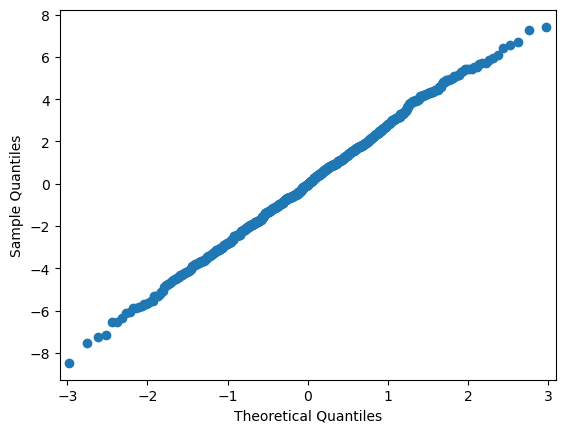

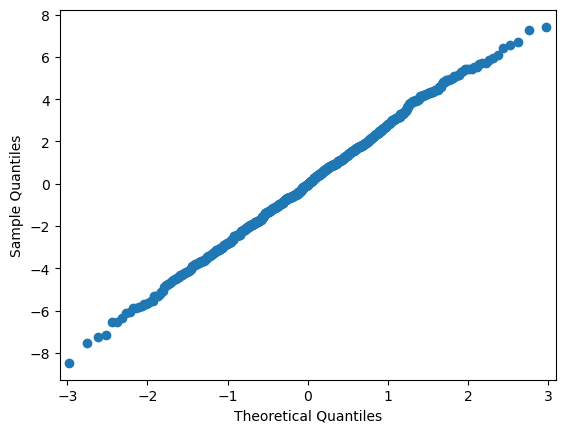

In [13]:
res_full = model_full_new.resid
sm.qqplot(res_full)